<img src='https://www.iss.nus.edu.sg/Sitefinity/WebsiteTemplates/ISS/App_Themes/ISS/Images/branding-iss.png' width=15% style="float: right;">
<img src='https://www.iss.nus.edu.sg/Sitefinity/WebsiteTemplates/ISS/App_Themes/ISS/Images/branding-nus.png' width=15% style="float: right;">


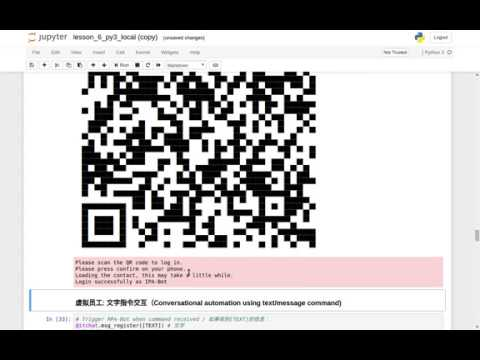

In [1]:
import IPython.display
IPython.display.YouTubeVideo('YSL--3j12VA')

# 如何使用和开发微信聊天机器人的系列教程
# A workshop to develop & use an intelligent and interactive chat-bot in WeChat

### WeChat is a popular social media app, which has more than 800 million monthly active users.

<img src='https://www.iss.nus.edu.sg/images/default-source/About-Us/7.6.1-teaching-staff/sam-website.tmb-.png' width=8% style="float: right;">
<img src='reference/WeChat_SamGu_QR.png' width=10% style="float: right;">


by: GU Zhan (Sam)


October 2018 : Update to support Python 3 in local machine, e.g. iss-vm.


April 2017 ======= Scan the QR code to become trainer's friend in WeChat =====>>

### 第六课：交互式虚拟助手的智能应用
### Lesson 6: Interactive Conversatioinal Virtual Assistant Applications / Intelligent Process Automations
* 虚拟员工: 贷款填表申请审批一条龙自动化流程 （Virtual Worker: When Chat-bot meets RPA-bot for mortgage loan application automation) 
* 虚拟员工: 文字指令交互（Conversational automation using text/message command) 
* 虚拟员工: 语音指令交互（Conversational automation using speech/voice command) 
* 虚拟员工: 多种语言交互（Conversational automation with multiple languages)

### Using Google Cloud Platform's Machine Learning APIs

From the same API console, choose "Dashboard" on the left-hand menu and "Enable API".

Enable the following APIs for your project (search for them) if they are not already enabled:
<ol>
**<li> Google Cloud Speech API </li>**
**<li> Google Cloud Text-to-Speech API </li>**
**<li> Google Cloud Translation API </li>**
</ol>

Finally, because we are calling the APIs from Python (clients in many other languages are available), let's install the Python package (it's not installed by default on Datalab)

In [2]:
# Copyright 2016 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); 
# !pip install --upgrade google-api-python-client

---

## <span style="color:blue">Virtual Worker: When Chat-bot meets RPA-bot</span> 


## 虚拟员工: 贷款填表申请审批一条龙自动化流程 （Mortgage loan application automation)

### Synchronous processing when triggering RPA-Bot

In [3]:
# Library/Function to use operating system's shell script command, e.g. bash, echo, cd, pwd, etc
import subprocess, time

In [4]:
# Funciton to trigger RPA-Bot (TagUI script: mortgage loan application automation) from VA-Bot (python script)
# Trigger RPA-Bot [ Synchronous  ]
def didi_invoke_rpa_bot(rpa_bot_file, rpa_bot = 'reference/S-IPA-Workshop/TagUI-S-IPA/src/tagui'):

# Invoke RPA-Bot script
    print('[ W I P ] In progress to invoke RPA-Bot using command: \n{}'.format(
            'bash' + ' ' + rpa_bot + ' ' + rpa_bot_file))
    start = time.time()
    return_code = subprocess.call(['bash', rpa_bot, rpa_bot_file])
    end = time.time()
    if return_code == 0:
        print('[  Sync OK  ] RPA-Bot succeeded! [ Return Code : {} ]'.format(return_code))
    else:
        print('[ ERROR ] RPA-Bot failed! [ Return Code : {} ]'.format(return_code))

    return return_code, int(round(end - start, 0)) # return_code & time_spent in seconds

In [5]:
# Uncomment below lines for an agile demo outside Chat-bot:
# rpa_bot_file = 'reference/S-IPA-Workshop/workshop3/VisualAutomation/KIE-Loan-Applicaiton-VA-Serverless/VA-KIE-Loan-Applicaiton.txt'
# return_code = didi_invoke_rpa_bot(rpa_bot_file)

### Asynchronous processing when triggering RPA-Bot

In [6]:
# Trigger RPA-Bot [ Asynchronous  ]
# http://docs.dask.org/en/latest/_downloads/daskcheatsheet.pdf
from dask.distributed import Client
def didi_invoke_rpa_bot_async(rpa_bot_file):
    client = Client(processes=False) # https://github.com/dask/distributed/issues/1825
    ipa_task = client.submit(didi_invoke_rpa_bot, rpa_bot_file)
    ipa_task.add_done_callback(didi_invoke_rpa_bot_async_upon_completion)
    return 0, 0 # Dummy return. Actual result is returned by function didi_invoke_rpa_bot_async_upon_completion(ipa_task)

In [7]:
from tornado import gen 
# https://stackoverflow.com/questions/40477518/how-to-get-the-result-of-a-future-in-a-callback
@gen.coroutine
def didi_invoke_rpa_bot_async_upon_completion(ipa_task):
    print(u'[ Terminal Info ] didi_invoke_rpa_bot_async(rpa_bot_file) [ upon_completion ]')
    return_code, time_spent = ipa_task.result()
    print(return_code)
    print(time_spent)
    
    # Send confirmation message upon triggering RPA-Bot 
#     itchat.send(u'[ Async OK ] IPA Command completed !\n[ Time Spent : %s seconds ]\n %s' % (time_spent, parm_msg['Text']), parm_msg['FromUserName'])
    itchat.send(u'[ Async OK ] IPA Command completed !\n[ Time Spent : %s seconds ]' % (time_spent), parm_msg['FromUserName']) # parm_msg['Text'] can be in-sync due to new coming message.
#     return return_code, time_spent # No return needed. No pace to hold the info

In [8]:
# Uncomment below lines for an agile demo outside Chat-bot:
# rpa_bot_file = 'reference/S-IPA-Workshop/workshop3/VisualAutomation/KIE-Loan-Applicaiton-VA-Serverless/VA-KIE-Loan-Applicaiton.txt'
# return_code = didi_invoke_rpa_bot_async(rpa_bot_file)

In [9]:
print('Continue other tasks in main program...\n...\n')

Continue other tasks in main program...
...



---

## <span style="color:blue">Wrap RPA-Bot into Functions() for conversational virtual assistant (VA):</span>
Reuse above defined Functions().

## 虚拟员工: 文字指令交互（Conversational automation using text/message command)

In [11]:
parm_msg = {} # Define a global variable to hold current msg

In [12]:
# Define "keywords intention command -> automation action" lookup to invoke RPA-Bot process automation functions
parm_bot_intention_action = {
      '#apply_loan': 'reference/S-IPA-Workshop/workshop3/VisualAutomation/KIE-Loan-Applicaiton-VA-Serverless/VA-KIE-Loan-Applicaiton.txt'
    , '#ocr_invoice': 'reference/S-IPA-Workshop/workshop3/VisualAutomation/KIE-Loan-Applicaiton-VA-Serverless/VA-KIE-Loan-Applicaiton.txt'
    , '#check_applicaiton': 'reference/S-IPA-Workshop/workshop3/VisualAutomation/KIE-Loan-Applicaiton-VA-Serverless/VA-KIE-Loan-Applicaiton.txt'
    , '#hi_everyone_welcome_to_see_you_here_in_the_process_automation_course': 'reference/S-IPA-Workshop/workshop3/VisualAutomation/KIE-Loan-Applicaiton-VA-Serverless/VA-KIE-Loan-Applicaiton.txt'
}


Retrieve rpa_bot_file based on received Chat-Bot command


In [13]:
# Retrieve rpa_bot_file based on received Chat-Bot command
def didi_retrieve_rpa_bot_file(chat_bot_command):
    print('[ W I P ] Retrieve rpa_bot_file based on received Chat-Bot command : {} -> {}'.format(
        chat_bot_command, chat_bot_command.lower()))
    
    if chat_bot_command.lower() in parm_bot_intention_action.keys():
        return parm_bot_intention_action[chat_bot_command.lower()]
    else:
        print('[ ERROR ] Command not found!')
        return None

In [14]:
# Uncomment below lines for an agile demo outside Chat-bot:
# didi_retrieve_rpa_bot_file('#apply_loan')

In [15]:
# Uncomment below lines for an agile demo outside Chat-bot:
# didi_retrieve_rpa_bot_file('#Apply_Loan')

In [16]:
# Uncomment below lines for an agile demo outside Chat-bot:
# didi_retrieve_rpa_bot_file('#approve_loan')

---

## 虚拟员工: 语音指令交互（Conversational automation using speech/voice command)

## <span style="color:blue">Use local AI module in native forms</span> for Speech Recognition: Speech-to-Text

### 导入需要用到的一些功能程序库： Local AI Module Speech-to-Text

In [17]:
# Local AI Module for Speech Synthesis: Speech-to-Text

# Install library into computer storage:
!pip install SpeechRecognition

!pip install pocketsphinx

# Load library into computer memory:
import speech_recognition as sr

IF **!pip install pocketsphinx** failed, THEN: **sudo apt-get install python python-dev python-pip build-essential swig libpulse-dev**

https://stackoverflow.com/questions/36523705/python-pocketsphinx-requesterror-missing-pocketsphinx-module-ensure-that-pocke


### Supported Languages  

https://github.com/Uberi/speech_recognition/blob/master/reference/pocketsphinx.rst#installing-other-languages.

By default, SpeechRecognition's Sphinx functionality supports only US English. Additional language packs are also available:
* English (Default support) : **en-US**
* International French : **fr-FR**
* Mandarin Chinese : **zh-CN**
* Italian : **it-IT**

### Utility function to convert mp3 file to 'wav / flac' audio file type:

In [18]:
# Flag to indicate the environment to run this program:

# Uncomment to run the code on Google Cloud Platform
# parm_runtime_env_GCP = True

# Uncomment to run the code in local machine
parm_runtime_env_GCP = False

import subprocess

# Utility function to convert mp3 file to target GCP audio file type:
#    audio_type = ['flac', 'wav']
#    audio_file_input = msg['FileName']

# Running Speech API
def didi_mp3_audio_conversion(audio_file_input, audio_type='flac'):
    audio_file_output = str(audio_file_input) + '.' + str(audio_type)
    
    # convert mp3 file to target GCP audio file:

# remove audio_file_output, if exists
    retcode = subprocess.call(['rm', audio_file_output])
    
    if parm_runtime_env_GCP: # using Datalab in Google Cloud Platform
        # GCP: use avconv to convert audio
        retcode = subprocess.call(['avconv', '-i', audio_file_input, '-ac', '1', audio_file_output])
    else: # using an iss-vm Virtual Machine, or local machine
        # VM : use ffmpeg to convert audio
        retcode = subprocess.call(['ffmpeg', '-i', audio_file_input, '-ac', '1', audio_file_output])
    
    if retcode == 0:
        print('[  O K  ] Converted  audio file for API: %s' % audio_file_output)
    else:
        print('[ ERROR ] Function: didi_mp3_audio_conversion() Return Code is : {}'.format(retcode))

    return audio_file_output # return file name string only

In [19]:
# convertion for files not in wav or flac format:
AUDIO_FILE = didi_mp3_audio_conversion("reference/S-IPA-welcome.mp3")
AUDIO_FILE = didi_mp3_audio_conversion("reference/S-IPA-welcome.mp3", 'wav')
# AUDIO_FILE = didi_mp3_audio_conversion("reference/text2speech.mp3")
# AUDIO_FILE = didi_mp3_audio_conversion("reference/text2speech.mp3", 'wav')

[  O K  ] Converted  audio file for API: reference/S-IPA-welcome.mp3.flac
[  O K  ] Converted  audio file for API: reference/S-IPA-welcome.mp3.wav


### Calling Local AI Module: speech_recognition.Recognizer().recognize_sphinx()

In [20]:
# Running Local AI Module Speech-to-Text
def didi_speech2text_local(AUDIO_FILE, didi_language_code='en-US'):
    # Python 2

    # use the audio file as the audio source
    r = sr.Recognizer()
    with sr.AudioFile(AUDIO_FILE) as source:
        audio = r.record(source)  # read the entire audio file
        
    transcription = ''
    # recognize speech using Sphinx
    try:
        transcription = r.recognize_sphinx(audio, language=didi_language_code)
        print("[ Terminal Info ] Sphinx thinks you said : \'{}\'.".format(transcription))
    except sr.UnknownValueError:
        print("[ Terminal Info ] Sphinx could not understand audio")
    except sr.RequestError as e:
        print("[ Terminal Info ] Sphinx error; {0}".format(e))
    
    return transcription


In [21]:
# Uncomment below lines for an agile demo outside Chat-bot:
# transcription = didi_speech2text_local(didi_mp3_audio_conversion("reference/S-IPA-welcome.mp3"))

In [22]:
# Uncomment below lines for an agile demo outside Chat-bot:
# transcription = didi_speech2text_local("reference/S-IPA-welcome.mp3.flac")

### Fuzzy match from 'transcribed audio command' to predefined 'chat_bot_command'

Automatically create a new lookup, by converting text-based intention command to voice-based intention command.

Example: from '#apply_loan' to 'voice command apply loan'

In [23]:
import json # Prints the nicely formatted dictionary
print(json.dumps(parm_bot_intention_action, indent=4, sort_keys=True))

{
    "#apply_loan": "reference/S-IPA-Workshop/workshop3/VisualAutomation/KIE-Loan-Applicaiton-VA-Serverless/VA-KIE-Loan-Applicaiton.txt",
    "#check_applicaiton": "reference/S-IPA-Workshop/workshop3/VisualAutomation/KIE-Loan-Applicaiton-VA-Serverless/VA-KIE-Loan-Applicaiton.txt",
    "#hi_everyone_welcome_to_see_you_here_in_the_process_automation_course": "reference/S-IPA-Workshop/workshop3/VisualAutomation/KIE-Loan-Applicaiton-VA-Serverless/VA-KIE-Loan-Applicaiton.txt",
    "#ocr_invoice": "reference/S-IPA-Workshop/workshop3/VisualAutomation/KIE-Loan-Applicaiton-VA-Serverless/VA-KIE-Loan-Applicaiton.txt"
}


In [24]:
import re
parm_bot_intention_action_fuzzy_match = {}
for intention, action in parm_bot_intention_action.items():
#     print(intention)
    intention_fuzzy_match = " ".join(re.split('#|_', intention.replace('#', 'voice_command_')))
#     print(action)
    parm_bot_intention_action_fuzzy_match[intention_fuzzy_match] = action

In [25]:
print(json.dumps(parm_bot_intention_action_fuzzy_match, indent=4, sort_keys=True))
# print(parm_bot_intention_action_fuzzy_match)

{
    "voice command apply loan": "reference/S-IPA-Workshop/workshop3/VisualAutomation/KIE-Loan-Applicaiton-VA-Serverless/VA-KIE-Loan-Applicaiton.txt",
    "voice command check applicaiton": "reference/S-IPA-Workshop/workshop3/VisualAutomation/KIE-Loan-Applicaiton-VA-Serverless/VA-KIE-Loan-Applicaiton.txt",
    "voice command hi everyone welcome to see you here in the process automation course": "reference/S-IPA-Workshop/workshop3/VisualAutomation/KIE-Loan-Applicaiton-VA-Serverless/VA-KIE-Loan-Applicaiton.txt",
    "voice command ocr invoice": "reference/S-IPA-Workshop/workshop3/VisualAutomation/KIE-Loan-Applicaiton-VA-Serverless/VA-KIE-Loan-Applicaiton.txt"
}


Fuzzy match function: Compare similarity between two text strings

In [26]:
# Compare similarity between two text strings
def did_fuzzy_match_score(string1, string2):
    print('\n[ Inside FUNCTION ] did_fuzzy_match_score')
    string1_list = string1.lower().split() # split by space
    string2_list = string2.lower().split() # split by space   

    print('string1_list : ', string1_list)
    print('string2_list : ', string2_list)
    
    # words in common
    common_words = set(string1_list)&set(string2_list)
#     print('len(common_words)  : ', len(common_words))

    # totoal unique words
    unique_words = set(string1_list + string2_list)
#     print('len(unique_words)  : ', len(unique_words))
    
    jaccard_similarity = float(len(common_words) / len(unique_words))

    print('jaccard_similarity : {0:.3f}'.format(jaccard_similarity))
    
    return jaccard_similarity

In [27]:
# Uncomment below lines for an agile demo outside Chat-bot:
did_fuzzy_match_score('run DIDI voice command apply loan', 'voice command apply loan')


[ Inside FUNCTION ] did_fuzzy_match_score
string1_list :  ['run', 'didi', 'voice', 'command', 'apply', 'loan']
string2_list :  ['voice', 'command', 'apply', 'loan']
jaccard_similarity : 0.667


0.6666666666666666

Retrieve rpa_bot_file based on received Chat-Bot command ( fuzzy match for voice/speech2text )


In [28]:
# Retrieve rpa_bot_file based on received Chat-Bot command ( fuzzy match for voice/speech2text )
def didi_retrieve_rpa_bot_file_fuzzy_match(speech2text_chat_bot_command, didi_confidence_threshold=0.8):
    print('\n[ Inside FUNCTION ] didi_retrieve_rpa_bot_file_fuzzy_match')
    matched_intention = [0.0, {}] # a lis to store intention_command of highest jaccard_similarity

    for intention, action in parm_bot_intention_action_fuzzy_match.items():
#         print('\nintention : ', intention)
#         print('action : ', action)
        fuzzy_match_score_current = did_fuzzy_match_score(intention, speech2text_chat_bot_command)
#         print('jaccard_similarity_score_current : ', jaccard_similarity_score_current)
        if fuzzy_match_score_current > matched_intention[0]:
            matched_intention[0] = fuzzy_match_score_current
            matched_intention[1] = {intention : action}
#             print('matched_intention : ', matched_intention)
    
    print('\n[ Finale ] matched_intention : ', matched_intention)
    
    if matched_intention[0] < didi_confidence_threshold: # not confident enough about fuzzy matched voice command
        return None
    else: # confident enough, thus return predefined rpa_bot_file
        return str(list(matched_intention[1].values())[0])    

In [29]:
# Control of asynchronous or synchronous processing when triggering RPA-Bot
parm_voice_command_confidence_threshold = 0.6

In [30]:
# Uncomment below lines for an agile demo outside Chat-bot:
action_rpa_bot_file = didi_retrieve_rpa_bot_file_fuzzy_match('run DIDI voice command apply loan', parm_voice_command_confidence_threshold)
print('\n[ Process Automation ] rpa_bot_file : ', action_rpa_bot_file)


[ Inside FUNCTION ] didi_retrieve_rpa_bot_file_fuzzy_match

[ Inside FUNCTION ] did_fuzzy_match_score
string1_list :  ['voice', 'command', 'apply', 'loan']
string2_list :  ['run', 'didi', 'voice', 'command', 'apply', 'loan']
jaccard_similarity : 0.667

[ Inside FUNCTION ] did_fuzzy_match_score
string1_list :  ['voice', 'command', 'ocr', 'invoice']
string2_list :  ['run', 'didi', 'voice', 'command', 'apply', 'loan']
jaccard_similarity : 0.250

[ Inside FUNCTION ] did_fuzzy_match_score
string1_list :  ['voice', 'command', 'check', 'applicaiton']
string2_list :  ['run', 'didi', 'voice', 'command', 'apply', 'loan']
jaccard_similarity : 0.250

[ Inside FUNCTION ] did_fuzzy_match_score
string1_list :  ['voice', 'command', 'hi', 'everyone', 'welcome', 'to', 'see', 'you', 'here', 'in', 'the', 'process', 'automation', 'course']
string2_list :  ['run', 'didi', 'voice', 'command', 'apply', 'loan']
jaccard_similarity : 0.111

[ Finale ] matched_intention :  [0.6666666666666666, {'voice command ap

---

### Control Parm

In [1]:
# Control of asynchronous or synchronous processing when triggering RPA-Bot
parm_asynchronous_process = True

# Control of asynchronous or synchronous processing when triggering RPA-Bot
parm_voice_command_confidence_threshold = 0.05 # low value for demo only


---

## <span style="color:blue">Start interactive conversational virtual assistant (VA):</span>

### Import ItChat, etc. 导入需要用到的一些功能程序库：

In [31]:
import itchat
from itchat.content import *

### Log in using QR code image / 用微信App扫QR码图片来自动登录

In [32]:
# itchat.auto_login(hotReload=True) # hotReload=True: 退出程序后暂存登陆状态。即使程序关闭，一定时间内重新开启也可以不用重新扫码。
itchat.auto_login(enableCmdQR=-2) # enableCmdQR=-2: 命令行显示QR图片

Getting uuid of QR code.


                                                                              
  ██████████████    ██  ████  ██      ████  ██    ██  ██      ██████████████  
  ██          ██    ██  ██  ████        ██████      ██        ██          ██  
  ██  ██████  ██  ████████      ████  ████  ████    ██  ████  ██  ██████  ██  
  ██  ██████  ██  ██  ██        ██  ██  ██████      ████████  ██  ██████  ██  
  ██  ██████  ██    ██  ████      ██  ██      ████  ████      ██  ██████  ██  
  ██          ██      ████████  ██  ██  ██████  ██    ██      ██          ██  
  ██████████████  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██████████████  
                    ██  ████  ██████      ██████  ████  ████                  
        ████  ████  ████    ████  ██        ████████                ████      
    ██      ██  ██████        ██  ██      ████  ██  ██  ████    ████    ██    
    ██  ████████  ██  ██████  ██            ████  ████  ████████  ████    ██  
    ████    ██  ██  ██  ██  ██        ████  ██  ██  

Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 白黑


### 虚拟员工: 文字指令交互（Conversational automation using text/message command)

In [33]:
# Trigger RPA-Bot when command received / 如果收到[TEXT]的信息：
@itchat.msg_register([TEXT]) # 文字
def didi_ipa_text_command(msg):
    global parm_msg
    parm_msg = msg
    if msg['Text'][0] == '#':
        # Retrieve rpa_bot_file based on received Chat-Bot command
        rpa_bot_file = didi_retrieve_rpa_bot_file( msg['Text'])
        
        if rpa_bot_file == None: # input command / rpa_bot_file NOT FOUND!
            print(u'[ Terminal Info ] RPA-Bot [ ERROR ] Command not found : [ %s ] %s From: %s' 
                  % (msg['Type'], msg['Text'], msg['FromUserName']))
            itchat.send(u'RPA-Bot [ ERROR ] Command not found : \n[ %s ]\n%s' % (msg['Type'], msg['Text']), msg['FromUserName'])
        else:
            print(u'[ Terminal Info ] RPA-Bot [ W I P ] Command : [ %s ] %s From: %s' 
                  % (msg['Type'], msg['Text'], msg['FromUserName']))
            print(u'[ Terminal Info ] RPA-Bot [ W I P ] File    : %s' % (rpa_bot_file))
            
            if parm_asynchronous_process: # Don't wait for RPA-Bot completion 
                # Send 'work in progress' message triggering RPA-Bot
                itchat.send(u'[ Async WIP ] IPA Command triggered: \n[ %s ]\n%s' % (msg['Type'], msg['Text']), msg['FromUserName'])
                
                # Trigger RPA-Bot [ Asynchronous ]
                didi_invoke_rpa_bot_async(rpa_bot_file) # No return of return_code, time_spent
            else: # Wait for RPA-Bot completion 
                # Send 'work in progress' message triggering RPA-Bot
                itchat.send(u'[ Sync WIP ] IPA Command triggered: \n[ %s ]\n%s' % (msg['Type'], msg['Text']), msg['FromUserName'])
                
                # Trigger RPA-Bot [ Synchronously ]
                return_code, time_spent = didi_invoke_rpa_bot(rpa_bot_file)
                print(u'[ Terminal Info ] didi_invoke_rpa_bot(rpa_bot_file) [ Return Code : %s ]' % (return_code))
                
                if return_code == 0:
                    # Send confirmation message upon RPA-Bot completion
                    itchat.send(u'[ Sync OK ] IPA Command completed : \n[ %s ]\n%s\n[ Time Spent : %s seconds ]' % (msg['Type'], msg['Text'], time_spent), msg['FromUserName'])
                else:
                    # Error when running RPA-Bot task
                    itchat.send(u'[ Sync ERROR] [ Return Code : %s ] IPA Command failed : \n[ %s ]\n%s\n[ Time Spent : %s seconds ]' % (return_code, msg['Type'], msg['Text'], time_spent), msg['FromUserName'])
                    
    else:
        print(u'[ Terminal Info ] Thank you! 谢谢亲[嘴唇]我已收到 I received: [ %s ] %s From: %s' 
              % (msg['Type'], msg['Text'], msg['FromUserName']))
        itchat.send(u'Thank you! 谢谢亲[嘴唇]我已收到\nI received:\n[ %s ]\n%s' % (msg['Type'], msg['Text']), msg['FromUserName'])


### 虚拟员工: 语音指令交互（Conversational automation using speech/voice command)

In [34]:
# 1. 语音转换成消息文字 (Speech recognition: voice to text)

@itchat.msg_register([RECORDING], isGroupChat=True)
@itchat.msg_register([RECORDING])
def download_files(msg):
    msg.download(msg.fileName)
    print('\nDownloaded audio file name is: %s' % msg['FileName'])
    
    
    ###########################################################################################################
    #                                  call audio analysis Local AI Sphinx                                    #
    ###########################################################################################################
    
    audio_analysis_reply = u'[ Audio Analysis 音频处理结果 ]\n'

    # Voice to Text:
    audio_analysis_reply += u'\n[ Voice -> Text 语音识别 ]\n'
    response = didi_speech2text_local(didi_mp3_audio_conversion(msg['FileName']), 'en-US')
    
    rpa_bot_file = didi_retrieve_rpa_bot_file_fuzzy_match(response, parm_voice_command_confidence_threshold)
    
    if rpa_bot_file == None: # input command / rpa_bot_file NOT FOUND!
        print(u'[ Terminal Info ] Not Confident IPA Command\n') 
        audio_analysis_reply += str(response) + u'\n( Not Confident IPA Command )\n'
    else:
        print(u'[ Terminal Info ] RPA-Bot [ W I P ] Command : %s' % (response))
        print(u'[ Terminal Info ] RPA-Bot [ W I P ] File    : %s' % (rpa_bot_file))
            
        if parm_asynchronous_process: # Don't wait for RPA-Bot completion 
            # Send 'work in progress' message triggering RPA-Bot
            audio_analysis_reply += (u'[ Async WIP ] IPA Command triggered\n')
                
            # Trigger RPA-Bot [ Asynchronous ]
            didi_invoke_rpa_bot_async(rpa_bot_file) # No return of return_code, time_spent
        else: # Wait for RPA-Bot completion 
            # Send 'work in progress' message triggering RPA-Bot
            audio_analysis_reply += (u'[ Sync WIP ] IPA Command triggered\n')
                
            # Trigger RPA-Bot [ Synchronously ]
            return_code, time_spent = didi_invoke_rpa_bot(rpa_bot_file)
            print(u'[ Terminal Info ] didi_invoke_rpa_bot(rpa_bot_file) [ Return Code : %s ]' % (return_code))
                
            if return_code == 0:
                # Send confirmation message upon RPA-Bot completion
                audio_analysis_reply += (u'[ Sync OK] [ Return Code : %s ] IPA Command completed !\n[ Time Spent : %s seconds ]' % (return_code, time_spent))
            else:
                # Error when running RPA-Bot task
                audio_analysis_reply += (u'[ Sync ERROR] [ Return Code : %s ] IPA Command failed !\n[ Time Spent : %s seconds ]' % (return_code, time_spent))
    
    return audio_analysis_reply

---

In [38]:
itchat.run()

Start auto replying.



Downloaded audio file name is: 181030-165136.mp3
[  O K  ] Converted  audio file for API: 181030-165136.mp3.flac
[ Terminal Info ] Sphinx thinks you said : 'we're in a lie low'.

[ Inside FUNCTION ] didi_retrieve_rpa_bot_file_fuzzy_match

[ Inside FUNCTION ] did_fuzzy_match_score
string1_list :  ['voice', 'command', 'apply', 'loan']
string2_list :  ["we're", 'in', 'a', 'lie', 'low']
jaccard_similarity : 0.000

[ Inside FUNCTION ] did_fuzzy_match_score
string1_list :  ['voice', 'command', 'ocr', 'invoice']
string2_list :  ["we're", 'in', 'a', 'lie', 'low']
jaccard_similarity : 0.000

[ Inside FUNCTION ] did_fuzzy_match_score
string1_list :  ['voice', 'command', 'check', 'applicaiton']
string2_list :  ["we're", 'in', 'a', 'lie', 'low']
jaccard_similarity : 0.000

[ Inside FUNCTION ] did_fuzzy_match_score
string1_list :  ['voice', 'command', 'hi', 'everyone', 'welcome', 'to', 'see', 'you', 'here', 'in', 'the', 'process', 'automation', 'course']
string2_list :  ["we're", 'in', 'a', 'lie',

Bye~


---

In [39]:
# interupt kernel, then logout
itchat.logout() # 安全退出

<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '请求成功', 'Ret': 0, 'RawMsg': 'logout successfully.'}}>

---

### 恭喜您！已经完成了：

### 第六课：交互式虚拟助手的智能应用
### Lesson 6: Interactive Conversatioinal Virtual Assistant Applications / Intelligent Process Automations
* 虚拟员工: 贷款填表申请审批一条龙自动化流程 （Virtual Worker: When Chat-bot meets RPA-bot for mortgage loan application automation) 
* 虚拟员工: 文字指令交互（Conversational automation using text/message command) 
* 虚拟员工: 语音指令交互（Conversational automation using speech/voice command) 
* 虚拟员工: 多种语言交互（Conversational automation with multiple languages)

<img src='reference/WeChat_SamGu_QR.png' width=80% style="float: left;">


---

## <span style="color:blue">Exercise / Workshop Enhancement</span> Use Cloud AI APIs

## <span style="color:blue">Install the client library</span> for 虚拟员工: 语音指令交互（Conversational automation using speech/voice command)

### [ Hints ]

In [ ]:
# !pip install --upgrade google-cloud-speech

In [ ]:
# Imports the Google Cloud client library
from google.cloud import speech
from google.cloud.speech import enums
from google.cloud.speech import types

In [ ]:
# !pip install --upgrade google-cloud-texttospeech

In [ ]:
# Imports the Google Cloud client library
from google.cloud import texttospeech

---

## <span style="color:blue">Exercise / Workshop Enhancement</span> Use Cloud AI APIs

## <span style="color:blue">Install the client library</span> for 虚拟员工: 多种语言交互（Conversational automation with multiple languages)

### [ Hints ]

In [ ]:
# !pip install --upgrade google-cloud-translate

In [ ]:
# Imports the Google Cloud client library
from google.cloud import translate

---

---